# Desafio Cientista de Dados - Incidium

### INTRODUÇÃO

#### Objetivo Geral

O objetivo deste desafio é testar os conhecimentos sobre a resolução de problemas de negócios, análise de dados e aplicação de modelos preditivos. Queremos testar seus conhecimentos dos conceitos estatísticos de modelos preditivos, criatividade na resolução de problemas e aplicação de modelos básicos de machine learning.  

É importante deixar claro que não existe resposta certa e que o que nos interessa é sua capacidade de descrever e justificar os passos utilizados na resolução do problema.

#### Desafio

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente que o core business é compra e venda de veículos usados. Essa empresa está com dificuldades na área de revenda dos automóveis usados em seu catálogo.


Para resolver esse problema, a empresa comprou uma base de dados de um marketplace de compra e venda para entender melhor o mercado nacional, de forma a conseguir precificar o seu catálogo de forma mais competitiva e assim recuperar o mau desempenho neste setor.


Seu objetivo é analisar os dados para responder às perguntas de negócios feitas pelo cliente e criar um modelo preditivo que precifique os carros do cliente de forma que eles fiquem o mais próximos dos valores de mercado. 


Para isso são fornecidos os datasets: 

- Um dataset para treinamento chamado cars_training composto por 29584 linhas, 28 colunas de informação (features) e a variável a ser prevista (“preco”). 

- Um segundo dataset para teste chamado de cars_test composto por  9862 linhas e 28 colunas, sendo que este dataset não possui a coluna “preco”. 

#### Objetivos Específicos

1.	Utilizando as variáveis (features), faça um relatório com uma análise das principais estatísticas da base de dados. Descreva graficamente essas variáveis (features), apresentando as suas principais estatísticas descritivas. Comente o porquê da escolha destas estatísticas e o que elas nos informam.

2.	Faça uma EDA. Nesta EDA, crie e responda 3 hipóteses de negócio. Além disso,  responda também às seguintes perguntas de negócio:
    -	a. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
    -	b. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
    -	c. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê? 
<br />
<br />
3.	Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


### DICIONÁRIO DOS DADOS

-	**id:** Contém o identificador único dos veículos cadastrados na base de dados
-	**num_fotos:** contém a quantidade de fotos que o anuncio do veículo contém
-	**marca:** Contém a marca do veículo anunciado
-	**modelo:** Contém o modelo do veículo anunciado
-	**versao:** Contém as descrições da versão do veículo anunciando. Sua cilindrada, quantidade de válvulas, se é flex ou não, etc.
-	**ano_de_fabricacao:** Contém o ano de fabricação do veículo anunciado
-	**ano_modelo:** Contém o modelo do ano de fabricação do veículo anunciado
-	**hodometro:** Contém o valor registrado no hodômetro do veículo anunciado
-	**cambio:** Contém o tipo de câmbio do veículo anunciado
-	**num_portas:** Contém a quantidade de portas do veículo anunciado
-	**tipo:** Contém o tipo do veículo anunciado. Se ele é sedã, hatch, esportivo, etc.
-	**blindado:** Contém informação se o veículo anunciado é blindado ou não
-	**cor:** Contém a cor do veículo anunciado
-	**tipo_vendedor:** Contém informações sobre o tipo do vendedor do veículo anunciado. Se é pessoa física (PF) ou se é pessoa jurídica (PJ)
-	**cidade_vendedor:** Contém a cidade em que vendedor do veículo anunciado reside
-	**estado_vendedor:** Contém o estado em que vendedor do veículo anunciado reside
-	**anunciante:** Contém o tipo de anunciante do vendedor do veículo anunciado. Se ele é pessoa física, loja, concessionário, etc
-	**entrega_delivery:** Contém informações se o vendedor faz ou não delivery do veículo anunciado
-	**troca:** Contém informações o veículo anunciado já foi trocado anteriormente
-	**elegivel_revisao:** Contém informações se o veículo anunciado precisa ou não de revisão
-	**dono_aceita_troca:** Contém informações se o vendedor aceita ou não realizar uma troca com o veículo anunciado
-	**veiculo_único_dono:** Contém informações o veículo anunciado é de um único dono
-	**revisoes_concessionaria:** Contém informações se o veículo anunciado teve suas revisões feitas em concessionárias
-	**ipva_pago:** Contém informações se o veículo anunciado está com o IPVA pago ou não
-	**veiculo_licenciado:** Contém informações se o veículo anunciado está com o licenciamento pago ou não
-	**garantia_de_fábrica:** Contém informações o veículo anunciado possui garantia de fábrica ou não
-	**revisoes_dentro_agenda:** Contém informações se as revisões feitas do veículo anunciado foram realizadas dentro da agenda prevista
-	**veiculo_alienado:** Contém informações se o veículo anunciado está alienado ou não
-	**preco (target):** Contém as informações do preço do veículo anunciado

### ANÁLISE EXPLORATÓRIA DOS DADOS - EDA

**Objetivo Específico 1.** Utilizando as variáveis (features), faça um relatório com uma análise das principais estatísticas da base de dados. Descreva graficamente essas variáveis (features), apresentando as suas principais estatísticas descritivas. Comente o porquê da escolha destas estatísticas e o que elas nos informam.

#### Importando as bibliotecas para a EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary

Devido ao uso de algumas bibliotecas menos usuais para a exploração dos dados, é necessários a instalação de alguns pacotes, como:
- summarytools
- Jinja2

Recomenda-se o uso da linha de comando como o exemplo abaixo:

```pip install sumarytools```

#### Importando o dataset

In [85]:
cars = pd.read_csv('cars_train.csv', encoding='utf-16-le', delimiter='\t')
# Uma nova importação que conserva o padrão original da importação
cars_original = pd.read_csv('cars_train.csv', encoding='utf-16-le', delimiter='\t') 

Obs: o arquivo esta no formato unicode UTF-16 LE, portanto foi necessário sinalizar no campo encoding.
Além disso, após algumas tentivas, identificou-se que, ao ler o arquivo, o delimitador que separa as informações era "\t", novamente, tal informação foi necessária ser expressa na leitura do dataset.

In [3]:
cars.head(3)

id  num_fotos   marca   modelo  \
0  300716223898539419613863097469899222392        8.0  NISSAN    KICKS   
1  279639842134129588306469566150288644214        8.0    JEEP  COMPASS   
2   56414460810621048900295678236538171981       16.0     KIA  SORENTO   

                                  versao  ano_de_fabricacao  ano_modelo  \
0        1.6 16V FLEXSTART SL 4P XTRONIC               2017      2017.0   
1        2.0 16V FLEX LIMITED AUTOMÁTICO               2017      2017.0   
2  2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO               2018      2019.0   

   hodometro      cambio  num_portas  ... elegivel_revisao dono_aceita_troca  \
0    67772.0         CVT           4  ...            False               NaN   
1    62979.0  Automática           4  ...            False      Aceita troca   
2    44070.0  Automática           4  ...            False      Aceita troca   

  veiculo_único_dono                       revisoes_concessionaria  ipva_pago  \
0                NaN  Todas as revisões feitas pela concessionária  IPVA pago   
1                NaN                                           NaN  IPVA pago   
2                NaN                                           NaN        NaN   

  veiculo_licenciado garantia_de_fábrica  revisoes_dentro_agenda  \
0         Licenciado                 NaN                     NaN   
1                NaN                 NaN                     NaN   
2                NaN                 NaN                     NaN   

   veiculo_alienado          preco  
0               NaN   74732.590084  
1               NaN   81965.332634  
2               NaN  162824.814472  

[3 rows x 29 columns]

#### Analisando o formato do dataset e característica dos dados

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [5]:
cars.describe()

num_fotos  ano_de_fabricacao    ano_modelo      hodometro  \
count  29407.000000       29584.000000  29584.000000   29584.000000   
mean      10.323834        2016.758552   2017.808985   58430.592077   
std        3.487334           4.062422      2.673930   32561.769309   
min        8.000000        1985.000000   1997.000000     100.000000   
25%        8.000000        2015.000000   2016.000000   31214.000000   
50%        8.000000        2018.000000   2018.000000   57434.000000   
75%       14.000000        2019.000000   2020.000000   81953.500000   
max       21.000000        2022.000000   2023.000000  390065.000000   

         num_portas  veiculo_alienado         preco  
count  29584.000000               0.0  2.958400e+04  
mean       3.940677               NaN  1.330239e+05  
std        0.338360               NaN  8.166287e+04  
min        2.000000               NaN  9.869951e+03  
25%        4.000000               NaN  7.657177e+04  
50%        4.000000               NaN  1.143558e+05  
75%        4.000000               NaN  1.636796e+05  
max        4.000000               NaN  1.359813e+06

In [6]:
#Concentração dos dados nulos
cars.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

In [7]:
dfSummary(cars)

Após analisar as informações do dataset e das colunas, algumas ações e tratmentos possíveis são:

- Remover coluna 'id' (individualização das observações, não traz informação acerca dos veículos)

- Analisar como preencher dados faltantes em ```num_fotos```.

- Transformar ```ano_modelo``` de *float* para *int*

- Tratar informações de colunas categóricas

- Usar algum *label encoder* para as colunas como: ```cambio, blindado, elegivel_revisao, dono_aceita_troca, veiculo_único_dono...```

- Rever se há necessidade de alguma ação para o desbalanceamento na coluna ```blindado``` (N: 99,3% e S: 0,7%)

- Analisar a possibilidade de dropar as colunas **elegivel_revisao** e **veiculo_alienado**, pois todos valores constam como: ```False``` e ```NaN```, respectivamente. **Sugestão:** Analisar dataset de teste e verificar se os valores também são todos também ```False``` ou ```NaN``` e validar com área de Eng. de Dados e/ou negócio se é uma informação não coletada.

- Tratar valores faltantes (```NaN```) nas colunas: ```[dono_aceita_troca, veiculo_único_dono, revisoes_concessionaria, ipva_pago, veiculo_licenciado, garantia_de_fábrica, revisoes_dentro_agenda]```. De início, supõe-se que os valores ```NaN``` podem indicar a resposta negativa, como: *Veículo **não** licenciado*, *IPVA **não** pago*, *Dono **não** aceita troca*, etc.

- Vale ressaltar que não há duplicatas no dataset.

In [8]:
#Removendo a clouna 'id' do dataset
cars.drop(columns='id', inplace=True)

#### Analise Visual das Informações

In [9]:
from scipy.stats import pearsonr
from ydata_profiling import ProfileReport

In [10]:
profile = ProfileReport(cars, title="Cars Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Biblioteca Sweetviz

# import sweetviz as sv
# report = sv.analyze([cars, "Name"]);
#report.show_html()

# Para a biblioteca abaixo é preciso mudar versão do pandas para 1.5.3

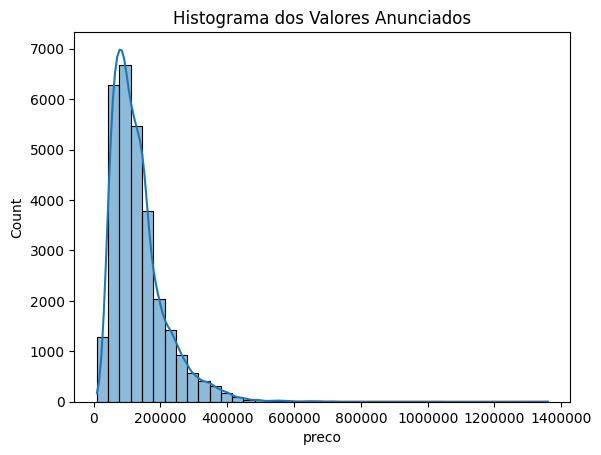

In [12]:
# Analise da distribuição dos valores de preco
ax = sns.histplot(data=cars, x='preco', bins=40, kde=True)
ax.set_title('Histograma dos Valores Anunciados')
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [13]:
cars['preco'].describe().apply(lambda x: format(x, 'f'))

count      29584.000000
mean      133023.879880
std        81662.872247
min         9869.950645
25%        76571.768462
50%       114355.796998
75%       163679.617425
max      1359812.892309
Name: preco, dtype: object

- Os preços variam predominantemente de 0 a 400 mil, podendo chegar a valores próximos de 1.4 milhão.

In [14]:
cars.describe()

num_fotos  ano_de_fabricacao    ano_modelo      hodometro  \
count  29407.000000       29584.000000  29584.000000   29584.000000   
mean      10.323834        2016.758552   2017.808985   58430.592077   
std        3.487334           4.062422      2.673930   32561.769309   
min        8.000000        1985.000000   1997.000000     100.000000   
25%        8.000000        2015.000000   2016.000000   31214.000000   
50%        8.000000        2018.000000   2018.000000   57434.000000   
75%       14.000000        2019.000000   2020.000000   81953.500000   
max       21.000000        2022.000000   2023.000000  390065.000000   

         num_portas  veiculo_alienado         preco  
count  29584.000000               0.0  2.958400e+04  
mean       3.940677               NaN  1.330239e+05  
std        0.338360               NaN  8.166287e+04  
min        2.000000               NaN  9.869951e+03  
25%        4.000000               NaN  7.657177e+04  
50%        4.000000               NaN  1.143558e+05  
75%        4.000000               NaN  1.636796e+05  
max        4.000000               NaN  1.359813e+06

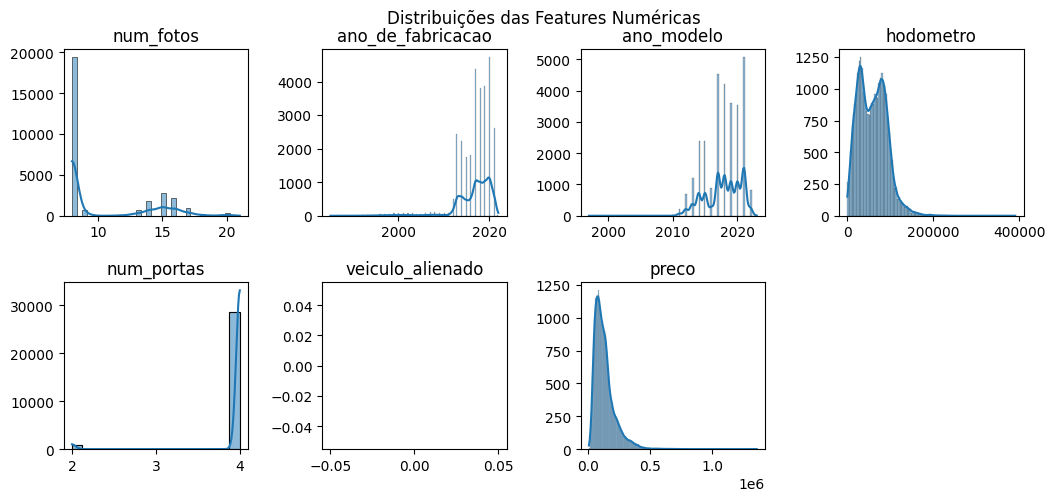

In [15]:
# Distribuição das variáveis numéricas
feature_num_names = ['num_fotos', 'ano_de_fabricacao', 'ano_modelo', 'hodometro', 'num_portas', 'veiculo_alienado', 'preco']

fig = plt.figure(figsize=(12,5))

for number, category in enumerate(feature_num_names, start=1):
    ax = fig.add_subplot(2, 4, number)
    sns.histplot(data=cars, x=category, kde=True)
    plt.title(category)
    ax.set_ylabel('')
    ax.set_xlabel('')      

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Distribuições das Features Numéricas')
plt.show()

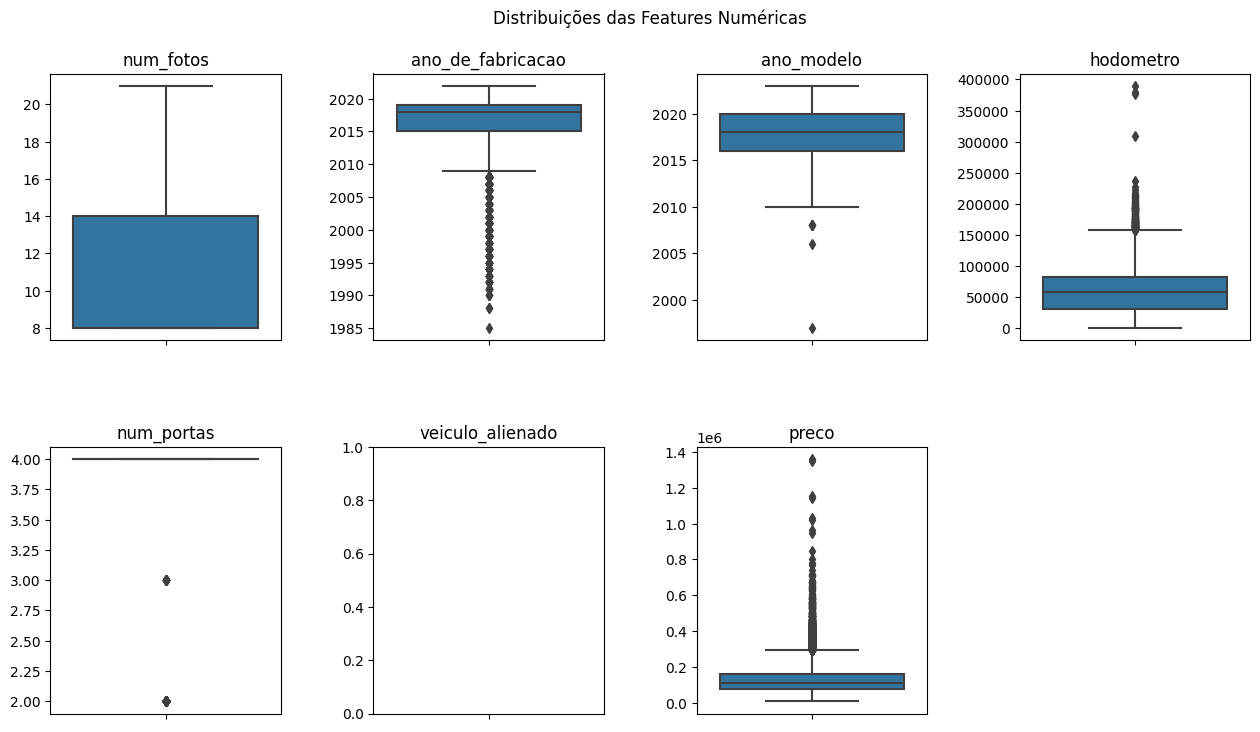

In [39]:
# Boxplot das variáveis numéricas
fig = plt.figure(figsize=(15,8))

for number, category in enumerate(feature_num_names, start=1):
    ax = fig.add_subplot(2, 4, number)
    sns.boxplot(data=cars, y=category)
    plt.title(category)
    ax.set_ylabel('')
    ax.set_xlabel('')      

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Distribuições das Features Numéricas')
plt.show()

- Com exceção da coluna ```num_fotos```, as demais todas apresentam outliers.

#### Analise detalhada das colunas (features):

**num_fotos:** 
- há valores faltantes
- nos dados inseridos o valor mínimo é de 8 fotos
- a maioria dos anúncios (65,6%) tem exatamente 8 fotos
- os seguintes 26% no ranking tem entre 15 e 17 fotos
- baixa correlação com o preço (-0.051)
- alta correlação com tipo_vendedor e anunciante

**marca:**
- as três marcas que mais estão disponíveis são: VOLKSWAGEN, CHEVROLET, TOYOTA
- juntas, as marcas top 3 somam mais de 30% do dataset
- há 40 valores distintos para essa feature e não há valores faltantes

**modelo:**
- há mais de 450 valores distintos e sem valores faltantes
- apenas 69 valores (0.2%) aparecem uma única vez

**versão:**
- string longa com: potência (1.0, 2.0 ...), qtde de portas, se é: gasolina/flex/dieses, ...

**ano_fabricacao:**
- varia de 1985 a 2022
- massiva maioria é de 2012+
- alta correlação com: ano_modelo(0.97), hodometro(-0.8)
- certa correlação com: preço (0.26) e cor(0.23)

**ano_modelo:**
- varia de 1997 a 2023
- massiva maioria é de 2012+
- dos 17 valores, 16 são 2006+ (o outro é 1997)
- alta correlação com: ano_fabricacao(0.97), hodometro(-0.8)
- certa correlação com: preço (0.25) e cor(0.21)

**hodometro:**
- dados bastante dispersos (CV = 0.55)
- desvio padrão de 32 mil
- valores de 100 a 390 mil
- distribuição se concentra entre 10mil a 110 mil (90% dos dados)
- correlação com o preço (-0.36)

**cambio:**
- 7 valores distintos, acredito que seria possível diminuir pela repetição de entradas
- desbalanceado

**num_portas:**
- dados desbalanceados
- entradas são: 2(2.9%), 3 (0.1%) e 4 (97%)
- calcular correlaçoes após a mudança de dtype

**tipo:**
- exemplo: sedã, picape, minivan....
- 7 valores distintos (talvez agrupar em 5 caterias pois as últimas 3 somam 0.3%)

**blindado:**
- grande desbalanço: 99.2% e 0.8%
- esta como categorico, poderia ser transformado para 0 e 1

**cor:**
- 7 cores diferentes
- cerca de 90% é branco/preto
- quase 10% é cinza/prata
- <0.3% é vermelho/verde/dourado

**tipo_vendedor:**
- PF (60%) e PJ (40%)
- alta correlação com anunciante e num_fotos
- certa correlação com os anos

**cidade:** mais 550 cidades distintas

**estado:** 25 estados, mais de 55% é SP, baixas correlações (máximo de 0.14 com anunciante)

**anunciante:**
- pf (61%%), loja(33%), concessionária(6%) ou "Acessórios e serviços para autos"(<0.1%)
- inserir última categoria em outra? 
- usar label_encoder
- loja e concessionária poderia ser uma?
- manter apenas uma feature: anunciante ou tipo_vendedor

**entre_delievery**
- correlação com fotos, anunciante, tipo vendedor, troca
- 80% é false

**troca**
- maioria (83%) não aceita troca
- correlação com fotos, anunciante, tipo vendedor, delievery
- sem correlação com preço

**elegivel_revisao** e **veiculo_alienado:**
- todos valores constam como: ```False``` e ```NaN```, respectivamente
- verificar se isso continua no dataset de treino, para não dropar as colunas e perder infos
- negócio: validar com área de Eng. de Dados e/ou negócio se é uma informação não coletada

**dono_aceita_troca, veiculo_único_dono, revisoes_concessionaria, ipva_pago, veiculo_licenciado, garantia_de_fábrica, revisoes_dentro_agenda**
- estas colunas apresentam vários valores faltantes (```NaN```)
- essa falta pode indicar a resposta negativa, como: Veículo **não** licenciado*, *IPVA **não** pago*, *Dono **não** aceita troca, etc.

**TARGET: preco:**
- varia entre 9.870 a 1.359.813
- 90% dos dados estão entre 45mil a 290mil
- grande variança nos dados (CV: 0.61)
- principais correlações: anos, hodometro, tipo, cambio e marca

Vale ressaltar que muitas variáveis não entraram no mapa de correlação, pois apresentavam muitos dados faltantes.

#### Aprofundamentos que a análise sugeste:

##### Número de fotos:

Abaixo buscamos encontrar relações dos dados que podem nos trazer clareza sobre os anúncios sem fotos.

In [16]:
cars['num_fotos'].isna().value_counts()

num_fotos
False    29407
True       177
Name: count, dtype: int64

In [17]:
cars_sem_fotos = cars[cars['num_fotos'].isna()]

In [18]:
dfSummary(cars_sem_fotos)

c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\summarytools\summarytools.py:124: RuntimeWarning: divide by zero encountered in double_scalars
  stats += f"<br>IQR (CV) : {x.quantile(0.75) - x.quantile(0.25):.1f} ({x.mean()/x.std():.1f})"


Pela breve análise acima, a maioria dos anúncios é proviniente de lojas, porém há uma porcentagem significante de dados que vem de anúncios de pessoas física também. Como os dados não são de uma única localidade e sim bem esparsos/distribúidos, provavelmente não são de um mesmo anunciante. A partir disto, será assumido que estes anúncios não tem fotos (num caso real essa informação deveria ser verificado com o resposnável pelo banco de dados e/ou com o pessoal de negócios) e serão substituídos então por 0.

In [19]:
cars['num_fotos'].fillna(0, inplace=True)

##### Marca

Agrupando as marcas em grupo, com o objetivo de futuramente não aumentar em muitas dimensões o dataset para treinar os modelos.
Mantendo as 40 marcas, ao aplicar o One Hot Encoder eles iriam virar, no mínimo, 39 novas colunas. Ao agrupar as marcas, podemos diminuir esse número de colunas.

In [99]:
cars['marca'].value_counts()

marca
VOLKSWAGEN       4594
CHEVROLET        3020
TOYOTA           2180
HYUNDAI          2043
JEEP             2000
FIAT             1918
BMW              1784
AUDI             1698
PEUGEOT          1675
HONDA            1586
MERCEDES-BENZ    1125
FORD             1060
MITSUBISHI        862
LAND ROVER        760
RENAULT           538
NISSAN            438
KIA               408
PORSCHE           349
VOLVO             287
CITROËN           194
TROLLER           177
RAM               168
CHERY             153
JAGUAR            148
MINI              137
LEXUS              75
SUZUKI             41
SUBARU             41
DODGE              37
CHRYSLER           30
SSANGYONG          14
SMART              12
ALFA ROMEO          9
LIFAN               8
MASERATI            7
JAC                 3
IVECO               2
EFFA                1
FERRARI             1
BRM                 1
Name: count, dtype: int64

Analisando os dados acima, optou-se em separar as marcas em três grupos:
- Grupo 1: mais populares (12 marcas)
- Grupo 2: intermediarias (13 marcas)
- Grupo 3: menos populares (15 marcas)

In [118]:
grupo1 = cars['marca'].value_counts().index.tolist()[:12]
grupo2 = cars['marca'].value_counts().index.tolist()[12:25]
grupo3 = cars['marca'].value_counts().index.tolist()[25:]
len(grupo1), len(grupo2), len(grupo3)

(12, 13, 15)

Aplicando a categorização acima em uma nova coluna: ```clas_marcas```

In [129]:
def marca_classification(marca):
    if marca in grupo1:
        return 'Grupo 1'
    if marca in grupo2:
        return 'Grupo 2'
    else:
        return 'Grupo 3'

cars['clas_marca'] = cars['marca'].apply(lambda x:marca_classification(x))
cars[['marca', 'clas_marca']].head(3)

marca clas_marca
0  NISSAN    Grupo 2
1    JEEP    Grupo 1
2     KIA    Grupo 2

In [130]:
# Removendo a coluna marca
cars.drop(columns='marca', inplace=True)

##### Ano de Fabricação e Modelo

Os valores de ano de fabricação e modelo apresentaram uma alta correlação entre si (0.975). Abaixo é realizada uma análise da diferença entre os valores, para tomar a decisão de eventualmente remover uma das colunas.

In [20]:
cars_dif_anos = cars['ano_modelo'] - cars['ano_de_fabricacao']
porc = cars_dif_anos[cars_dif_anos <= 2.0].count()/cars_dif_anos.count() * 100
print(f"{round(porc, 2)} % dos registros tem 2 anos ou menos de diferença entre, o ano do modelo e ano de produção. ")

94.86 % dos registros tem 2 anos ou menos de diferença entre, o ano do modelo e ano de produção. 


In [21]:
print("Porcentagem de cada registro")
round(cars_dif_anos.value_counts(normalize=True),4)*100

Porcentagem de cada registro


1.0     47.92
0.0     40.96
2.0      5.97
3.0      1.13
4.0      0.44
5.0      0.40
6.0      0.30
12.0     0.29
13.0     0.28
11.0     0.27
10.0     0.26
7.0      0.24
15.0     0.23
14.0     0.23
9.0      0.21
8.0      0.21
16.0     0.20
17.0     0.14
18.0     0.12
19.0     0.06
20.0     0.05
21.0     0.04
22.0     0.02
23.0     0.01
28.0     0.00
Name: proportion, dtype: float64

In [22]:
porc = cars_dif_anos[cars_dif_anos >= 5.0].count()/cars_dif_anos.count() * 100
print(f"{round(porc, 2)} % dos registros tem 5 anos ou mais de diferença entre, o ano do modelo e ano de produção. ")

3.57 % dos registros tem 5 anos ou mais de diferença entre, o ano do modelo e ano de produção. 


Existe ainda uma certa quantidade de registros que apresentam uma grande diferença entre o ano do modelo e o ano de produção, desta forma, a influência de manter ambos os anos no modelo ou escolher entre um deles será reavaliada posteriormente, no processo de modelagem.

##### Hodometro

Análise de outliers:

Text(0.5, 1.0, 'Boxplots Hodometro - Análise de Outliers')

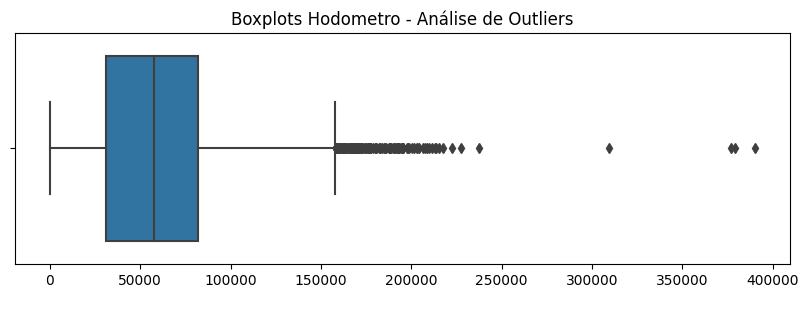

In [23]:
plt.figure(figsize=(10,3))
sns.boxplot(data=cars, x='hodometro')
plt.xlabel(" ")
plt.title('Boxplots Hodometro - Análise de Outliers')

In [24]:
# Encontrando a quantidade de outliers
Q1 = cars['hodometro'].quantile(0.25)
Q3 = cars['hodometro'].quantile(0.75)
IQR = Q3 - Q1
outliers_hod = cars[cars["hodometro"] >= Q3 + 1.5 * IQR]["hodometro"].count()
porc_outliers_hod = outliers_hod/cars["hodometro"].count() * 100
print(f"{round(porc_outliers_hod, 2)} % da coluna 'hodometro' são outliers.")

0.53 % da coluna 'hodometro' são outliers.


Apesar da quantidade de outliers não ser expressiva, pelo boxplot acima é possível notar que eles destoam bastante da média e mediana. A depender do modelo aplicado futuramente, será necessário um tratamento desses (e outros) outliers.

##### Cambio

In [25]:
cars["cambio"].value_counts()

cambio
Automática               22545
Manual                    4989
CVT                       1792
Automatizada               139
Automatizada DCT            53
Semi-automática             41
Automática Sequencial       25
Name: count, dtype: int64

Pelas categorias destacadas acima, determinou-se que as mesmas será transformadas em apenas duas categorias, **automática** e **manual**, assim:
 - ```CVT, Automatizada, Automatizada DCT, Semi-automática, Automática Sequencial``` viram ```Automática```

In [26]:
cars.replace(to_replace=["CVT", "Automatizada", "Automatizada DCT", "Semi-automática", "Automática Sequencial"],
             value="Automática", inplace=True)

In [27]:
cars["cambio"].value_counts()

cambio
Automática    24595
Manual         4989
Name: count, dtype: int64

##### Cor

Agrupando as cores menos frequentes.

In [51]:
cars['cor'].value_counts(normalize=True)

cor
Branco      0.708119
Preto       0.177664
Prata       0.058849
Cinza       0.055233
Dourado     0.000068
Verde       0.000034
Vermelho    0.000034
Name: proportion, dtype: float64

In [52]:
cars['cor'].replace(['Dourado','Verde','Vermelho'],'Outro',inplace=True)

In [54]:
cars['cor'].value_counts(normalize=True)*100

cor
Branco    70.811925
Preto     17.766360
Prata      5.884938
Cinza      5.523256
Outro      0.013521
Name: proportion, dtype: float64

##### Estado dos vendedores

Assim como mencionado anteriormente, se mantermos todos os valores, ao aplicar o One Hot Encoder teríamos muitas colunas, aumentando em 25 o número de dimensões. Com isto, optou-se criar uma nova coluna, na qual é adicionado a região brasileira a qual pertence cada estado. Diminuindo assim o número de dimensões de 25, para 5.

In [ ]:
# Nova coluna com regiões


##### Tipo

Agrupando os tipos de veículos menos frequentes.

In [88]:
cars['tipo'].value_counts(normalize=True)

tipo
Sedã                    0.555334
Hatchback               0.166441
Picape                  0.163906
Utilitário esportivo    0.112290
Perua/SW                0.000913
Cupê                    0.000879
Minivan                 0.000237
Name: proportion, dtype: float64

In [89]:
cars['tipo'].replace(['Perua/SW','Cupê','Minivan'],'Outro',inplace=True)
cars['tipo'].value_counts(normalize=True)

tipo
Sedã                    0.555334
Hatchback               0.166441
Picape                  0.163906
Utilitário esportivo    0.112290
Outro                   0.002028
Name: proportion, dtype: float64

##### Anunciante

In [28]:
print(cars["tipo_vendedor"].value_counts(), "\n \n", cars["anunciante"].value_counts())

tipo_vendedor
PF    17926
PJ    11658
Name: count, dtype: int64 
 
 anunciante
Pessoa Física                       17999
Loja                                 9879
Concessionária                       1702
Acessórios e serviços para autos        4
Name: count, dtype: int64


Apesar de ter uma leve discrepância nos dados de PF nas colunas "tipo_vendedor" e "anunciante", as informações que elas trazem são idênticas, se o anúncio é de Pessoa Física ou Pessoa Jurídica (Loja, Concessionária, Acessórios e serviços para autos).

Dessa forma, optou-se em manter apenas a coluna **tipo_vendedor**, por manter apenas duas classificações e apresentar correlações maiores com as demais features.

In [47]:
cars.drop(columns='anunciante', inplace=True)

##### Colunas único valor

Nas colunas **elegivel_revisao** e **veiculo_alienado** todos valores constam como: ```False``` ou ```NaN```, respectivamente. 

Abaixo é analisado o dataset de teste para verificar se os valores também são todos também ```False``` ou ```NaN```.

In [30]:
cars_test = pd.read_csv('cars_test.csv', encoding='utf-16-le', delimiter='\t')
cars_test.head(2)

id  num_fotos   marca  modelo  \
0   13518783164498355150900635905895481162        8.0  NISSAN   VERSA   
1  299896161723793383246777788797566040330       18.0    FIAT  STRADA   

                                 versao  ano_de_fabricacao  ano_modelo  \
0      1.6 16V FLEXSTART V-DRIVE MANUAL               2021      2021.0   
1  1.4 MPI WORKING CS 8V FLEX 2P MANUAL               2021      2021.0   

   hodometro  cambio  num_portas  ...  troca elegivel_revisao  \
0    20258.0  Manual           4  ...  False            False   
1    53045.0  Manual           2  ...  False            False   

  dono_aceita_troca veiculo_único_dono revisoes_concessionaria  ipva_pago  \
0      Aceita troca                NaN                     NaN  IPVA pago   
1      Aceita troca         Único dono                     NaN  IPVA pago   

  veiculo_licenciado  garantia_de_fábrica  revisoes_dentro_agenda  \
0         Licenciado  Garantia de fábrica                     NaN   
1         Licenciado                  NaN                     NaN   

   veiculo_alienado  
0               NaN  
1               NaN  

[2 rows x 28 columns]

In [31]:
print("Quantidade total de linhas do dataset:")
print(cars_test.shape[0])
print("Quantidade de linhas com 'veiculo_alienado = nan:")
print(cars_test["veiculo_alienado"].isna().sum())
print("Distribuição de valores na coluna 'elegivel_revisao':")
cars_test["elegivel_revisao"].value_counts()

Quantidade total de linhas do dataset:
9862
Quantidade de linhas com 'veiculo_alienado = nan:
9862
Distribuição de valores na coluna 'elegivel_revisao':


elegivel_revisao
False    9862
Name: count, dtype: int64

Como também no dataset de teste tais colunas não trazem variação de informação, as colunas serão removidas.

Ressalta-se a importância de validar com área de Eng. de Dados e/ou negócio se é uma informação não coletada de fato.

In [32]:
cars.drop(columns=["veiculo_alienado", "elegivel_revisao"], inplace=True)

##### Valores faltantes

Diversas colunas apresentam um valor ou valor faltante. Conforme análise prévia, os valores faltantes serão tratados como a resposta negativa para a pergunta (uma possibilidade é que essas informações tenham vindo de um sistema de cadastros onde estas features eram boxes de marcar, como em alguns casos não foi marcado, a feature ficou com valor faltante. Novamente destaca-se a improtância de validar essa hipótese com o resposnável pelo bano de dados e/ou responsáveis pelo negócio).

In [33]:
# tratamento das colunas
cars["dono_aceita_troca"].fillna("Não", inplace=True)
cars["veiculo_único_dono"].fillna("Não", inplace=True)
cars["revisoes_concessionaria"].fillna("Não", inplace=True)
cars["ipva_pago"].fillna("Não", inplace=True)
cars["veiculo_licenciado"].fillna("Não", inplace=True)
cars["garantia_de_fábrica"].fillna("Não", inplace=True)
cars["revisoes_dentro_agenda"].fillna("Não", inplace=True)

##### Drop de colunas

Após analisar a distribuição de algumas colunas categóricas, optou-se em remove-las, devido a uma grande variação de opções. Tal fato aumenta exponencialmente a dimensionalidade do dataset após o encoding (One Hot Encoder, já que não há uma ordinalidade nas mesmas). Além disso, por apresentar uma grande quantidade de valores distintos, estas colunas dificultam o processo de encontrar padrões nos modelos, ao tender a uma individualização das observações.

As colunas que serão removidas são: ```modelo, versao, cidade_vendedor```

In [84]:
cars.drop(columns=["modelo", "versao", "cidade_vendedor"], inplace=True)

#### RESUMO transformações feitas

**Importante:** aplicar tais transformações nos dados de teste posteriormente.

In [34]:
# 1. Preencher os dados faltantes do número de fotos com 0.
#cars['num_fotos'].fillna(0, inplace=True)

# 2. Recategorização dos dados de cambio
# cars.replace(to_replace=["CVT", "Automatizada", "Automatizada DCT", "Semi-automática", "Automática Sequencial"],
#             value="Automática", inplace=True)

# 3. Drop de colunas
#cars.drop(columns=["anunciante", "veiculo_alienado", "elegivel_revisao"], inplace=True)

#4. Tratamento dos valores faltantes em colunas
#cars["dono_aceita_troca"].fillna("Não", inplace=True)
#cars["veiculo_único_dono"].fillna("Não", inplace=True)
#cars["revisoes_concessionaria"].fillna("Não", inplace=True)
#cars["ipva_pago"].fillna("Não", inplace=True)
#cars["veiculo_licenciado"].fillna("Não", inplace=True)
#cars["garantia_de_fábrica"].fillna("Não", inplace=True)
#cars["revisoes_dentro_agenda"].fillna("Não", inplace=True)

# inserir novas transformações

#### Respondendo hipóteses propostas

##### a. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

Consideraremos nesta análise como marca popular as 6 marcas que tem mais veículos anunciados. Esse grupo de marcas dá *match* com o ranking de marcas de carros no Brasil que mais venderam veículos em 2022, conforme [esta matéria](https://www.olhonocarro.com.br/blog/marcas-de-carro-no-brasil/).

In [131]:
#Criando o dataset que contém apenas os anúncios das 6 marcas mais populares
marcas_populares = ["VOLKSWAGEN", "CHEVROLET", "TOYOTA", "HYUNDAI", "JEEP", "FIAT"]
cars_populares = cars_original[cars_original['marca'].isin(marcas_populares)]

In [132]:
print(f"Top 10 estados com mais anúncios de carros com marcas populares. \n")
print(cars_populares["estado_vendedor"].value_counts()[:10])

Top 10 estados com mais anúncios de carros com marcas populares. 

estado_vendedor
São Paulo (SP)            8711
Rio de Janeiro (RJ)       1376
Paraná (PR)               1265
Santa Catarina (SC)       1239
Minas Gerais (MG)          936
Rio Grande do Sul (RS)     836
Goiás (GO)                 424
Bahia (BA)                 353
Pernambuco (PE)            177
Paraíba (PB)                87
Name: count, dtype: int64


In [37]:
porc_sp = 8711/cars_populares["estado_vendedor"].value_counts().sum() * 100
print(f"{round(porc_sp, 1)} % dos carros de marcas populares são de SP.")

55.3 % dos carros de marcas populares são de SP.


In [38]:
lista_estados = ["São Paulo (SP)", "Rio de Janeiro (RJ)", "Paraná (PR)", "Santa Catarina (SC)", "Minas Gerais (MG)"]
data = list()
for estado in lista_estados:
    data.append(list(cars_populares[cars_populares["estado_vendedor"] == estado]['preco']))

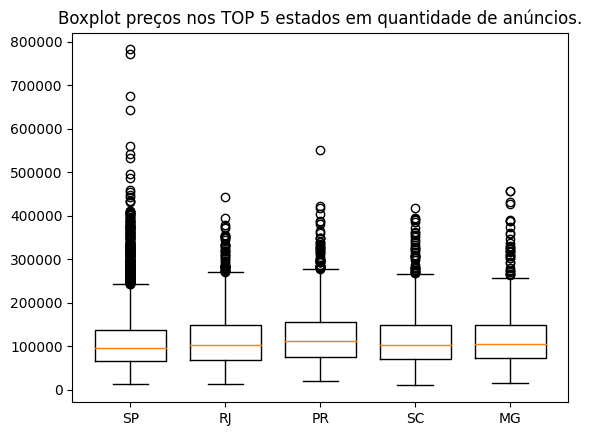

In [39]:
fig, ax = plt.subplots()

plotb = ax.boxplot(x=data, positions=[2, 4, 6, 8, 10], widths=1.5,
                   labels=["SP", "RJ", "PR", "SC", "MG"])
ax.set_title("Boxplot preços nos TOP 5 estados em quantidade de anúncios.")
plt.show()

A partir das observações acima, podemos observar que São Paulo é o estado com maior número de anúncios para carros de marcas populares, chegando a ter mais da metade de todo o país. Ao analisar a média de valor destes veículos nos 5 estados de maior número de anúncio, é perceptível que o preço médio para o estado de SP se mantém competitivo, permanecendo próximo dos demais e até mesm inferior a 2ª e 3ª posição deste mesmo ranking.

Com isso, podemos concluir que São Paulo seria o estado mais apropriado para vender um carro de marca popular, como os preços seguem a tendência nacional e há um número expressivo de ofertas, o mercado é mais propício para estes negócios.

##### b. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

In [40]:
cars_picape = cars.query('cambio == "Automática" & tipo == "Picape"')
cars_picape.head(2)

num_fotos       marca  modelo  \
3        14.0  VOLKSWAGEN  AMAROK   
48        8.0  VOLKSWAGEN    GOLF   

                                               versao  ano_de_fabricacao  \
3   2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...               2013   
48        1.4 TSI HIGHLINE 16V GASOLINA 4P AUTOMÁTICO               2013   

    ano_modelo  hodometro      cambio  num_portas    tipo  ...  \
3       2015.0    85357.0  Automática           4  Picape  ...   
48      2015.0    61472.0  Automática           4  Picape  ...   

   entrega_delivery  troca dono_aceita_troca veiculo_único_dono  \
3              True   True      Aceita troca                Não   
48            False  False               Não                Não   

                         revisoes_concessionaria  ipva_pago  \
3                                            Não  IPVA pago   
48  Todas as revisões feitas pela concessionária  IPVA pago   

    veiculo_licenciado  garantia_de_fábrica  \
3           Licenciado                  Não   
48          Licenciado                  Não   

                           revisoes_dentro_agenda          preco  
3                                             Não  123681.358857  
48  Todas as revisões feitas pela agenda do carro   86304.702755  

[2 rows x 26 columns]

In [41]:
cars_picape.groupby(["estado_vendedor"])["preco"].mean().sort_values()

estado_vendedor
Amazonas (AM)                62226.485320
Paraíba (PB)                 93157.035264
Ceará (CE)                  125209.173790
Mato Grosso do Sul (MS)     144700.247621
Acre (AC)                   145256.693656
Rio Grande do Norte (RN)    179961.694768
Rio de Janeiro (RJ)         180266.517470
Santa Catarina (SC)         186606.995687
Tocantins (TO)              187717.127524
São Paulo (SP)              188250.540793
Pernambuco (PE)             192566.764505
Minas Gerais (MG)           194953.405618
Rio Grande do Sul (RS)      195266.449017
Paraná (PR)                 197578.692308
Bahia (BA)                  203267.799879
Goiás (GO)                  206211.226170
Piauí (PI)                  208181.077756
Mato Grosso (MT)            214102.315642
Alagoas (AL)                218671.542780
Sergipe (SE)                298195.309673
Name: preco, dtype: float64

Pelo preço médio das picapes, os estados de Amazonas e Paraíba seriam os mais indicados, por apresentarem as menores médias.

Entretanto, é importante analisar o ano dos veículos, para verificar se ns referidos estados não há talvez apenas veículos mais antigos.

In [42]:
lista_estados = cars_picape['estado_vendedor'].unique()
data_2 = list()
for estado in lista_estados:
    data_2.append(list(cars_populares[cars_populares["estado_vendedor"] == estado]['ano_de_fabricacao']))

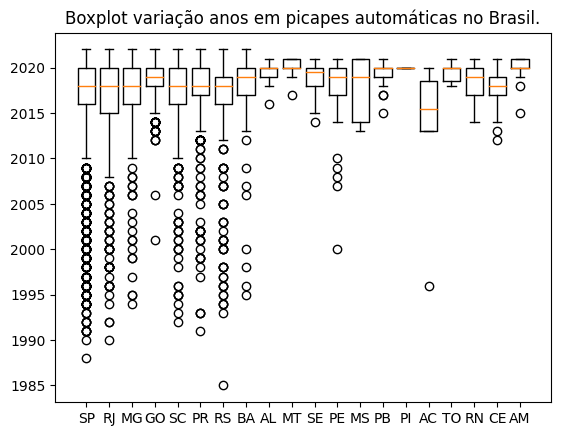

In [43]:
lista_siglas = ["SP", "RJ", "MG", "GO", "SC", "PR", "RS", "BA", "AL", "MT", "SE", "PE", "MS", "PB", "PI", "AC", "TO", "RN", "CE", "AM"]

fig, ax = plt.subplots()

plotb = ax.boxplot(x=data_2, positions=range(0,40,2), widths=1.5,
                   labels=lista_siglas)
ax.set_title("Boxplot variação anos em picapes automáticas no Brasil.")
plt.show()

Pelo gráfico acima, é possível notar que mesmo com valores inferiores aos demais estados, nos estados do Amazonas e Paraíba, a média do ano dos veículos remete a veículos recentes, inclsuive com baixos registros de carros antigos (representados no gráfico através dos outliers).

Desta forma, podemos concluir que Amazonas e Paraíba são ótimos candidatos para se buscar adquirir um uma picape de câmbio automático.

##### c. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

## MACHINE LEARNING

Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Como estamos buscando a predição de preços, nesse caso se trata de um problema de regressão.

Neste notebook são apresentados a análise e performance dos seguintes modelos:
- modelo 1
- modelo 2
- modelo 3

### Preparação do dataset para rodar nos modelos

- Scalling e encoding

- Tratamento de outliers ???

- PCA para features específicas (transformar uma feature com 5 classifcações em um componente de PCA)...

In [59]:
# Pre-processamento
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA

# Pipeline/Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Definindo as colunas numéricas a receberem Scaling (importante para modelos/métricas que usam distância)
feat_num = ['num_fotos', 'ano_de_fabricacao', 'ano_modelo', 'hodometro', 'num_portas']

# Definindo as colunas categóricas que vão receber o One Hot Encoding 
# (importante para modelos que não lidam bem com categóricas)
#
# Categóricas com apenas 2 opções
feat_ohc = ['cambio', 'blindado', 'tipo_vendedor', 'entrega_delivery', 'troca', 'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 
  'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda']
#Categóricas com 3+ opções
feat_ohcm = ['tipo', 'cor']

# Agrupa as duas listas acima
feat_ohc.extend(feat_ohcm)
print(feat_ohc)



############################################################################################

# Definindo as colunas a receberem Scaling, OneHotEncoder ou OrdinalEncoder
feat_num = churn_train.drop(columns='Churn').select_dtypes(include=np.number).columns
feat_cat = ['Gender']
feat_cat_ord = ['Subscription Type', 'Contract Length']
new_columns = list(feat_num) + feat_cat + feat_cat_ord + ['Churn']

# Montando transformação das colunas do dataset
preprocess = ColumnTransformer([
    ('std_scaler', StandardScaler(), feat_num),
    ('one_hot', OneHotEncoder(drop='first'), feat_cat),
    ('ord_code', OrdinalEncoder(categories=[subscription, contract]), feat_cat_ord)
], remainder='passthrough')



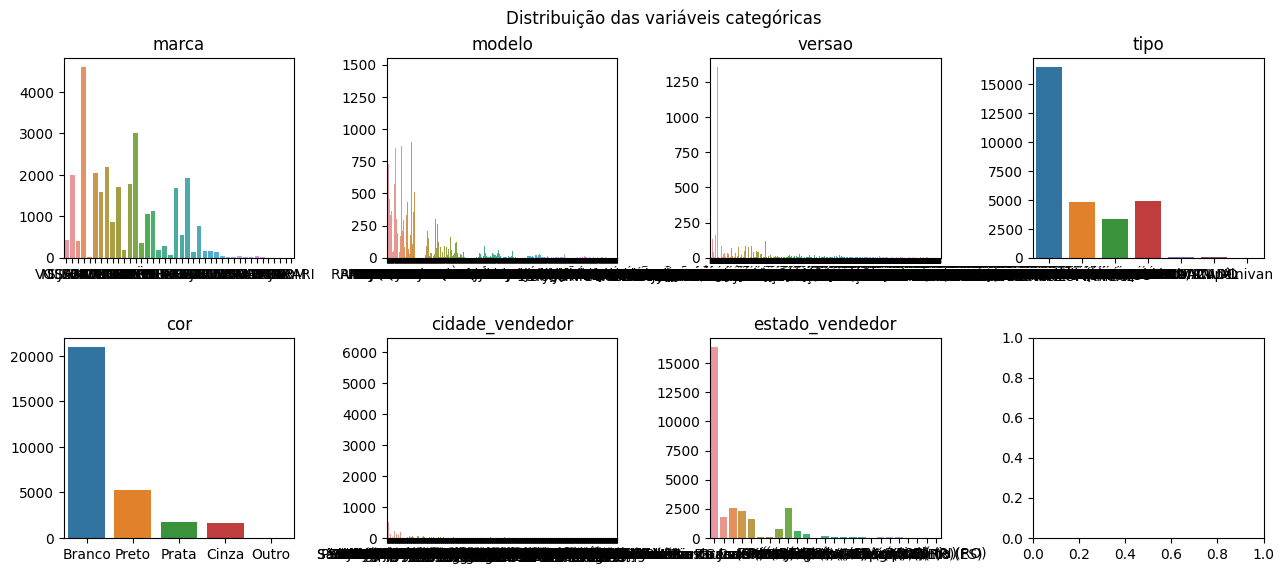

In [68]:
category_list = ['marca', 'modelo', 'versao','tipo', 'cor', 'cidade_vendedor', 'estado_vendedor']
count = 1

plt.subplots(2,4, figsize=(15,6))

for category in category_list:
    plt.subplot(2,4, count)
    sns.countplot(data=cars, x=category)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(category)
    count += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    
plt.suptitle('Distribuição das variáveis categóricas')
plt.show()


In [72]:
category_list = ['modelo', 'versao','tipo', 'cor', 'cidade_vendedor', 'estado_vendedor']
count = 1

for category in category_list:
    print(f"\nFeature: {category}")
    print(f"{len(cars[category].unique())} valores únicos")
    print("Distribuição do top 10:")
    print(cars[category].value_counts(normalize=True)[:10]*100)



Feature: marca
40 valores únicos
Distribuição do top 10:
marca
VOLKSWAGEN    15.528664
CHEVROLET     10.208221
TOYOTA         7.368848
HYUNDAI        6.905760
JEEP           6.760411
FIAT           6.483234
BMW            6.030287
AUDI           5.739589
PEUGEOT        5.661844
HONDA          5.361006
Name: proportion, dtype: float64

Feature: modelo
457 valores únicos
Distribuição do top 10:
modelo
COMPASS    5.002704
2008       4.837074
Q3         3.089508
TORO       3.048945
COROLLA    2.930638
ONIX       2.890076
320i       2.778529
AMAROK     2.450649
GOLF       2.356003
HILUX      2.190373
Name: proportion, dtype: float64

Feature: versao
1916 valores únicos
Distribuição do top 10:
versao
1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO                            4.570038
2.0 16V FLEX LIMITED AUTOMÁTICO                                   3.488372
2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC                    2.558816
1.0 200 TSI COMFORTLINE AUTOMÁTICO                                1.57

In [75]:
cars['versao']

0                          1.6 16V FLEXSTART SL 4P XTRONIC
1                          2.0 16V FLEX LIMITED AUTOMÁTICO
2                    2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO
3        2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...
4               2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO
                               ...                        
29579          2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO
29580                      1.0 200 TSI HIGHLINE AUTOMÁTICO
29581              2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO
29582               1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO
29583       3.0 TFSI AMBIENTE V6 24V GASOLINA 4P TIPTRONIC
Name: versao, Length: 29584, dtype: object

##### Ações pendentes